<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>

# Gradients

Understanding gradients will allow us to eventually understand edge detection which we will use later on, since its an important aspect of object detection in general.
Make sure to watch the lecture video for the full overview!

In [193]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [194]:
img = cv2.imread('/kaggle/input/sudoku/download.png',0)

In [195]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

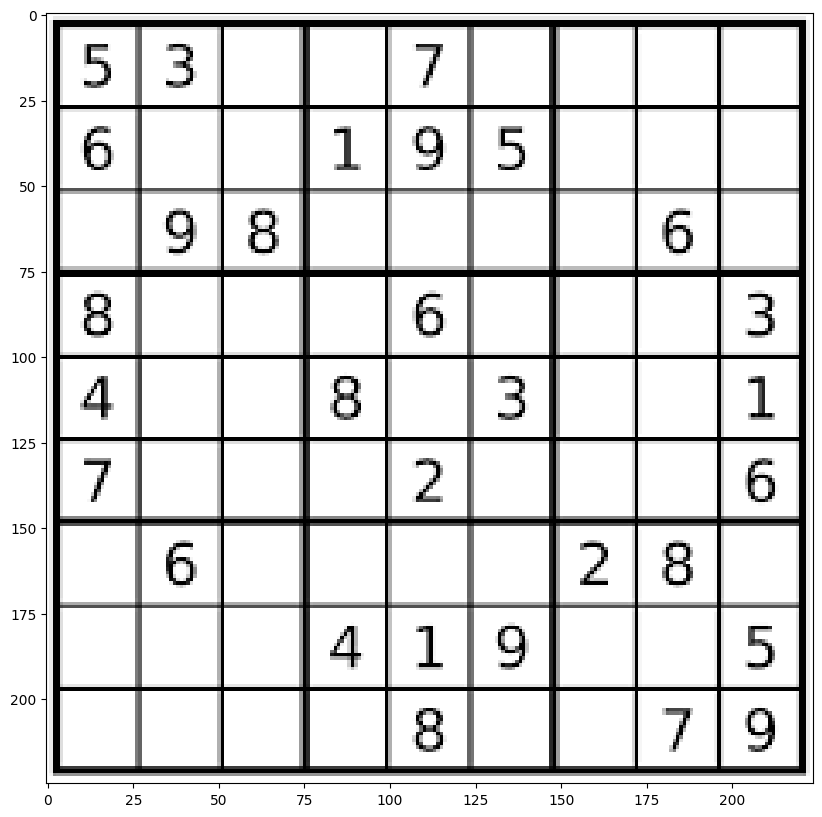

In [196]:
display_img(img)

In [197]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

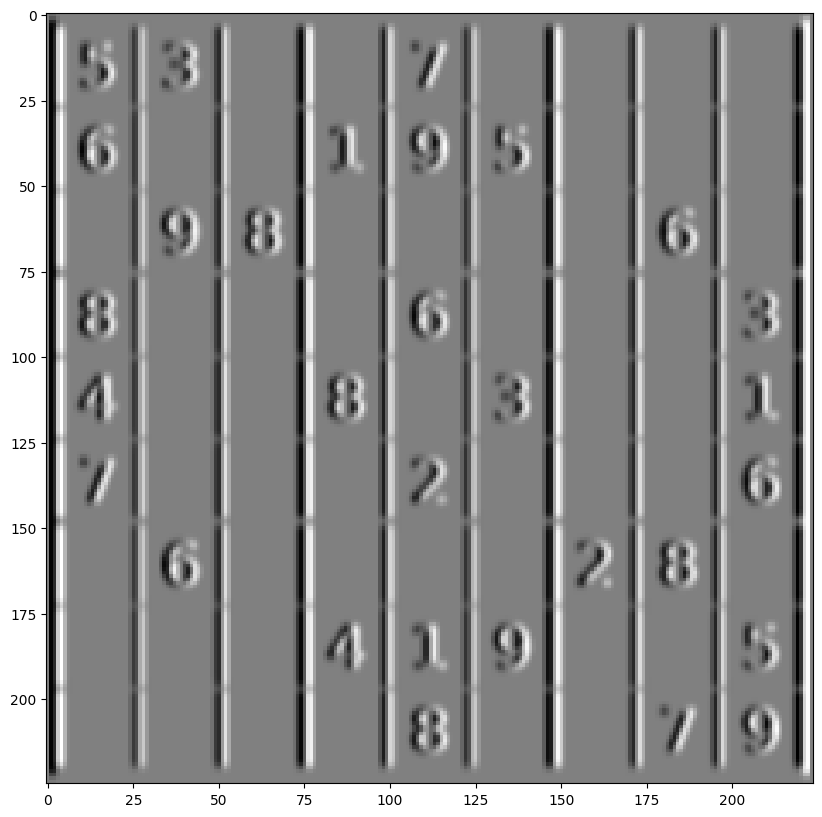

In [198]:
display_img(sobelx)

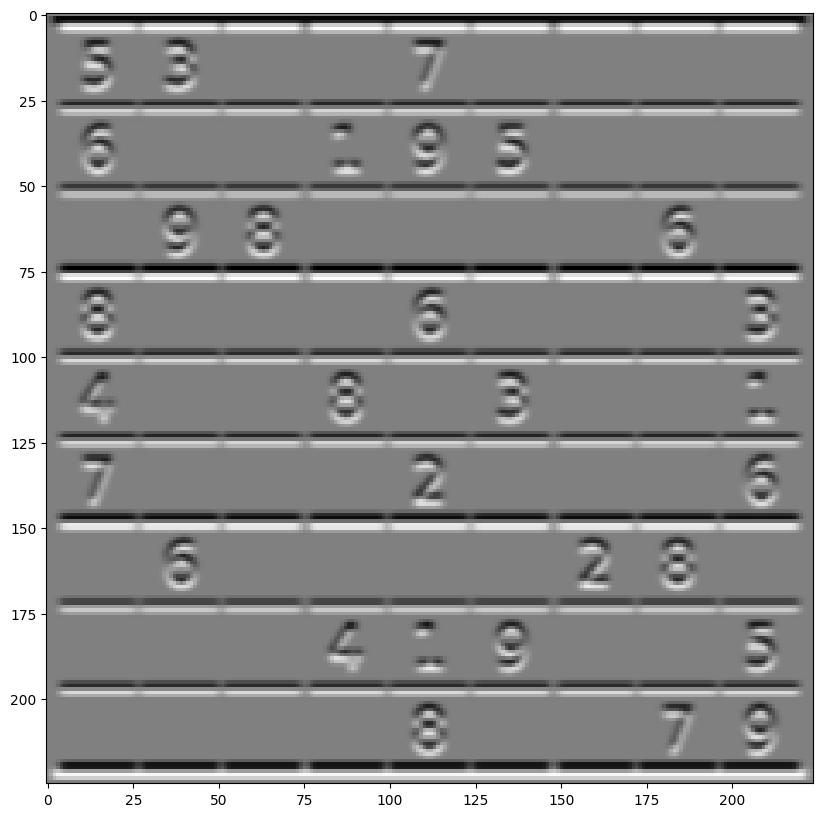

In [199]:
display_img(sobely)

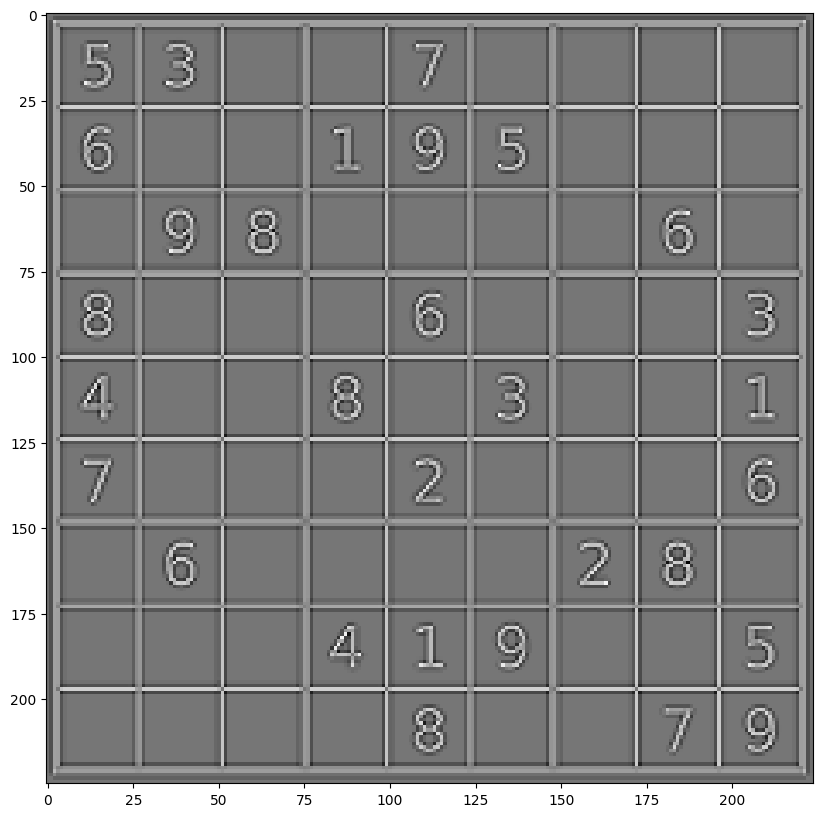

In [200]:
display_img(laplacian)

## Combining Previous Ideas

Let's play around with these images with some of the other ideas we've already seen!

### Blending Images

In [201]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)

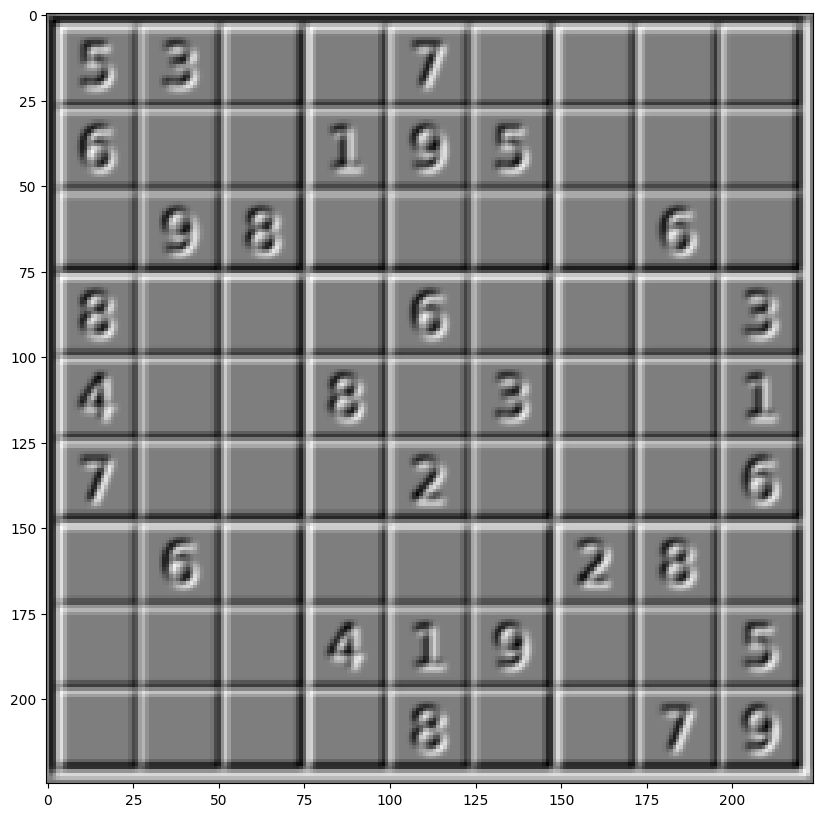

In [202]:
display_img(blended)

In [203]:
blended.shape

(225, 224)

### Morphological Operators

In [205]:
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

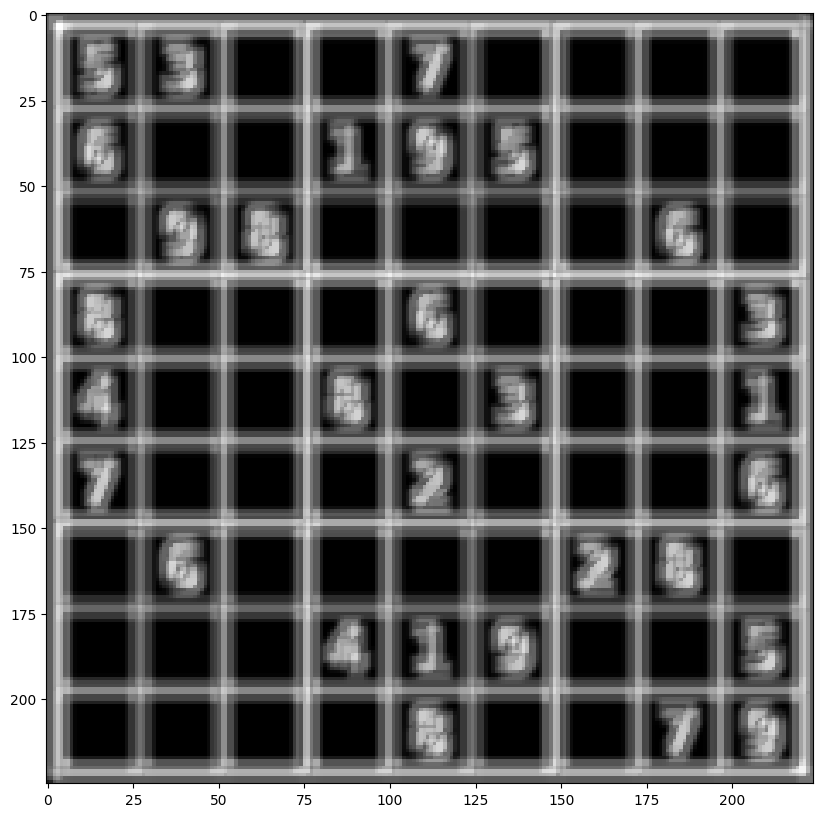

In [206]:
display_img(gradient)

Try it on the laplacian result!

In [207]:
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

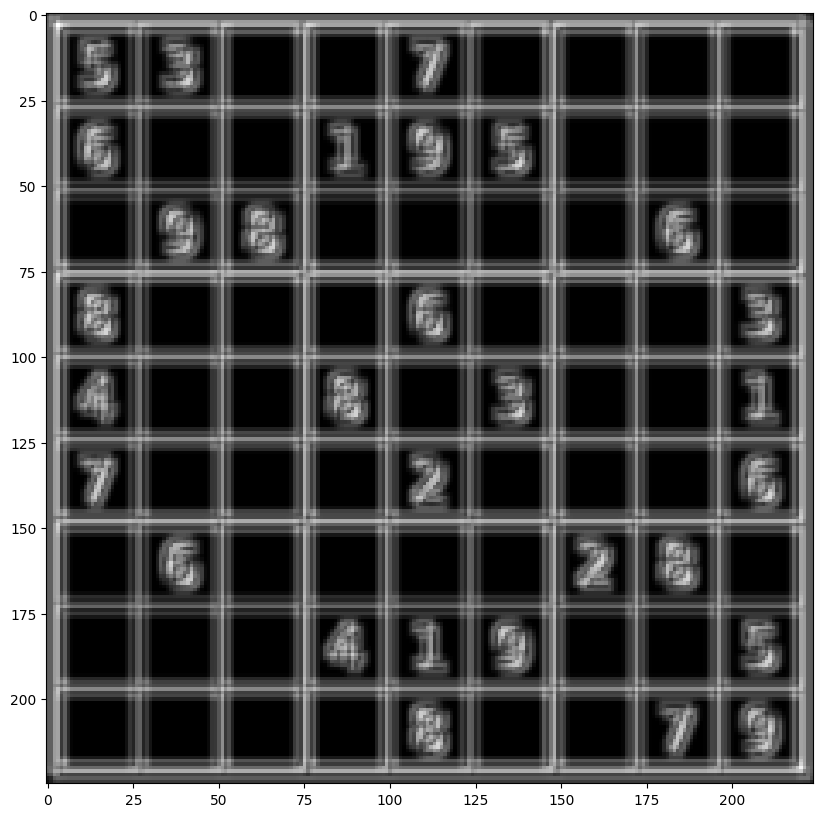

In [208]:
display_img(gradient)

### Thresholds

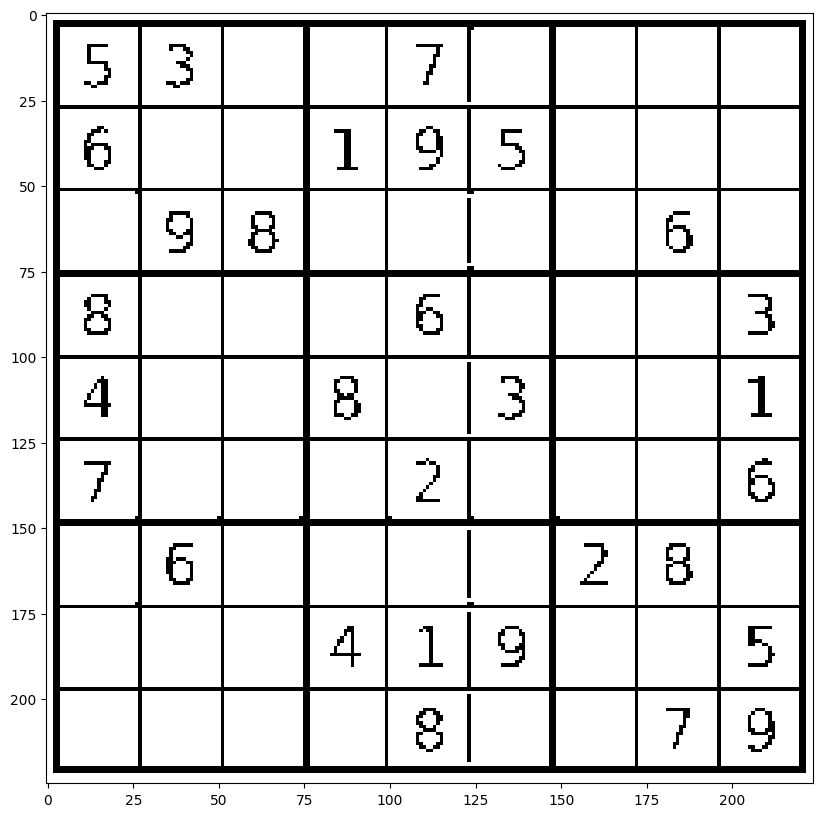

In [209]:
ret,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
display_img(th1)

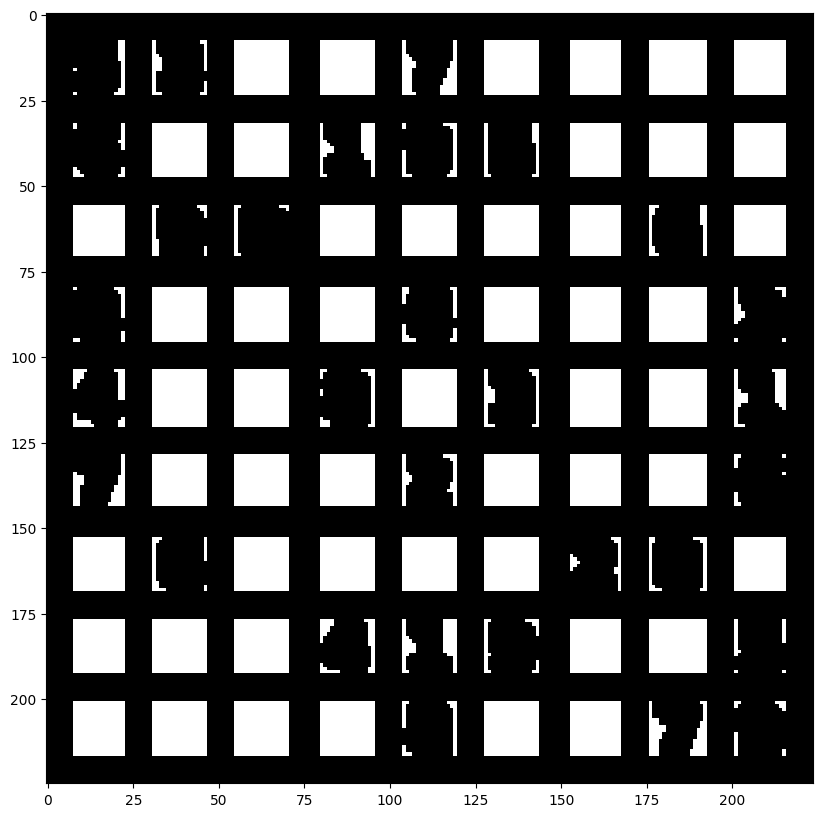

In [217]:
ret,th1 = cv2.threshold(gradient,200,255,cv2.THRESH_BINARY_INV)
display_img(th1)

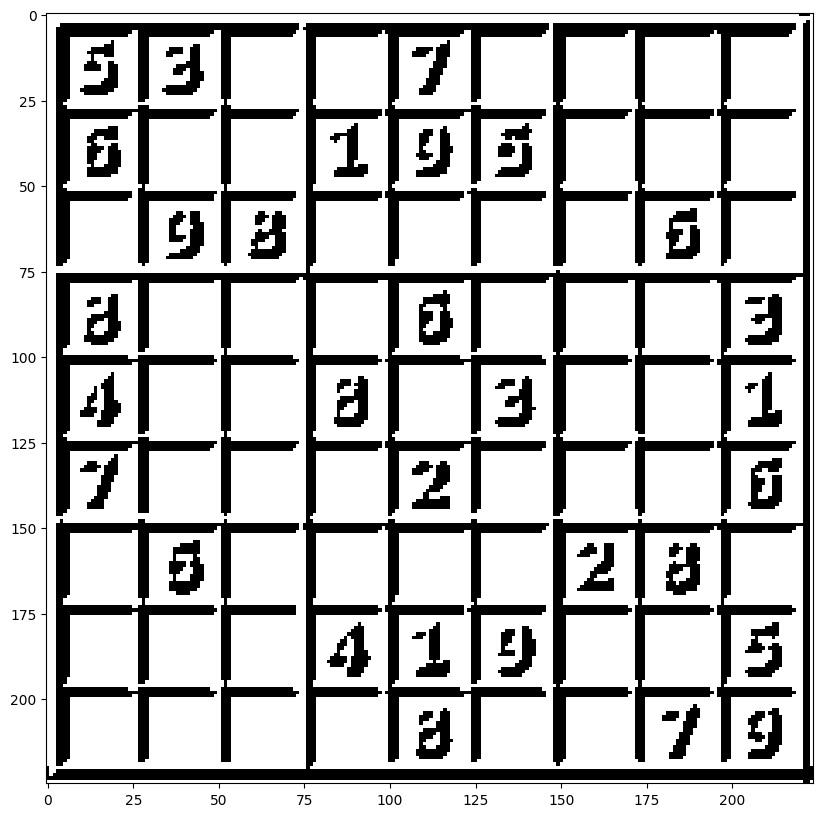

In [218]:
ret,th1 = cv2.threshold(blended,100,255,cv2.THRESH_BINARY_INV)
display_img(th1)

##### Great Work! Keep this sudoku in mind. Later on you will have the computer vision skills to create a program that can solve sudoku puzzles just by reading the image!